In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('./data/训练数据.csv')

In [4]:
data.reset_index(drop = True,inplace = True)
data

,date,黄金期货价格,论坛情绪值,美元指数,WTI原油,道琼斯指数,标普500指数,美联储利率,美国CPI月率,GPR,GEPU
0,2014-08-11,260.55,0.0,81.47,98.08,16569.98,1936.90,0.25,0.3,136.45,99.641198
1,2014-08-12,261.00,1.0,81.50,97.37,16560.54,1933.80,0.25,0.3,136.45,99.641198
2,2014-08-13,261.05,0.0,81.60,97.59,16651.80,1946.70,0.25,0.3,136.45,99.641198
3,2014-08-14,261.65,0.0,81.59,95.58,16713.58,1955.20,0.25,0.3,136.45,99.641198
4,2014-08-15,261.40,1.0,81.42,97.35,16662.91,1955.10,0.25,0.3,136.45,99.641198
...,...,...,...,...,...,...,...,...,...,...,...
2430,2024-08-05,559.94,1.0,102.69,72.94,38703.27,5186.33,5.50,-0.1,137.93,219.498876
2431,2024-08-06,554.18,0.0,102.97,73.20,38997.66,5240.03,5.50,-0.1,137.93,219.498876
2432,2024-08-07,556.06,0.0,103.20,75.23,38763.45,5199.50,5.50,-0.1,137.93,219.498876
2433,2024-08-08,556.10,1.0,103.21,76.19,39446.49,5319.31,5.50,-0.1,137.93,219.498876


In [5]:
data['论坛情绪值0'] = data['论坛情绪值']
tag = 0 # 0为不改变，1为改变
states = data.loc[0,'论坛情绪值']   #首次状态值
for i in range(len(data)-1):
    if data.loc[i+1,'论坛情绪值'] != states:
        tag = tag + 1
        if tag == 3:
            states = data.loc[i+1,'论坛情绪值']
            tag = 0
        else:
            data.loc[i+1,'论坛情绪值'] = states
    else:
        tag = 0
        states = data.loc[i+1,'论坛情绪值']

In [6]:
data['黄金期货价格'] = data['黄金期货价格'].apply(np.log)
data

,date,黄金期货价格,论坛情绪值,美元指数,WTI原油,道琼斯指数,标普500指数,美联储利率,美国CPI月率,GPR,GEPU,论坛情绪值0
0,2014-08-11,5.562795,0.0,81.47,98.08,16569.98,1936.90,0.25,0.3,136.45,99.641198,0.0
1,2014-08-12,5.564520,0.0,81.50,97.37,16560.54,1933.80,0.25,0.3,136.45,99.641198,1.0
2,2014-08-13,5.564712,0.0,81.60,97.59,16651.80,1946.70,0.25,0.3,136.45,99.641198,0.0
3,2014-08-14,5.567008,0.0,81.59,95.58,16713.58,1955.20,0.25,0.3,136.45,99.641198,0.0
4,2014-08-15,5.566052,0.0,81.42,97.35,16662.91,1955.10,0.25,0.3,136.45,99.641198,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2430,2024-08-05,6.327830,0.0,102.69,72.94,38703.27,5186.33,5.50,-0.1,137.93,219.498876,1.0
2431,2024-08-06,6.317490,0.0,102.97,73.20,38997.66,5240.03,5.50,-0.1,137.93,219.498876,0.0
2432,2024-08-07,6.320876,0.0,103.20,75.23,38763.45,5199.50,5.50,-0.1,137.93,219.498876,0.0
2433,2024-08-08,6.320948,0.0,103.21,76.19,39446.49,5319.31,5.50,-0.1,137.93,219.498876,1.0


In [7]:
x1 = []
y = []
for i in range(data.shape[0]-5):
    x1.append(data.loc[i:(i+4)][['黄金期货价格','论坛情绪值']].values)
    y.append(data.loc[i+5]['黄金期货价格'])

x1 = np.array(x1)
y = np.array(y)

In [8]:
x1 = x1.reshape(x1.shape[0],x1.shape[1]*x1.shape[2]) 
x1.shape

(2430, 10)

In [9]:
x1_train = x1[:1944]
y_train = y[:1944]

x1_test  = x1[1944:]
y_test  = y[1944:]

In [10]:
from sklearn.svm import SVR
## 建立SVM模型
svm = SVR().fit(x1_train,y_train)

In [11]:
pred = svm.predict(x1_test)

In [12]:
pred

array([5.89117243, 5.89993384, 5.89642466, 5.90007726, 5.90726852,
       5.92412211, 5.923608  , 5.91267653, 5.91256933, 5.90462303,
       5.89957616, 5.88852484, 5.88972731, 5.89113949, 5.89166083,
       5.89235065, 5.89131402, 5.88858335, 5.88548409, 5.88516421,
       5.88519686, 5.88500216, 5.887173  , 5.88956512, 5.89060534,
       5.88989678, 5.88936307, 5.88711171, 5.89267816, 5.88725527,
       5.89077991, 5.8969954 , 5.91494803, 5.91474123, 5.91434624,
       5.91396366, 5.91543581, 5.91673934, 5.90996698, 5.91418905,
       5.91100187, 5.90863561, 5.89814082, 5.89700065, 5.89627086,
       5.89521404, 5.89337683, 5.89152871, 5.89253886, 5.89376429,
       5.89507352, 5.89671298, 5.89859058, 5.90547885, 5.90054216,
       5.9035951 , 5.89979133, 5.91574551, 5.91087875, 5.90860409,
       5.90182116, 5.90648001, 5.91225224, 5.91553553, 5.91906801,
       5.92046792, 5.92196266, 5.92224012, 5.92277596, 5.9226771 ,
       5.92179286, 5.92139256, 5.92153184, 5.92255601, 5.92311

In [13]:
df0 = pd.DataFrame(pred,columns=['pred'])
df = pd.DataFrame(y_test,columns=['truth'])
from sklearn import metrics

df = pd.concat([df, df0], axis=1)
MSE = metrics.mean_squared_error(np.exp(y_test), np.exp(pred))
RMSE = np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(pred)))
MAE = np.sqrt(metrics.mean_absolute_error(np.exp(y_test), np.exp(pred)))
MAPE = np.sqrt(metrics.mean_absolute_percentage_error(np.exp(y_test), np.exp(pred)))
print("MSE:",MSE)    
print("RMSE:",RMSE)
print("MAE:",MAE)  
print("MAPE:",MAPE)
df

MSE: 2793.96928393353
RMSE: 52.85801059379297
MAE: 7.010682797194525
MAPE: 0.32065530511523066


,truth,pred
0,5.969168,5.891172
1,5.965018,5.899934
2,5.969270,5.896425
3,5.971262,5.900077
4,5.970037,5.907269
...,...,...
481,6.327830,6.188790
482,6.317490,6.188247
483,6.320876,6.186082
484,6.320948,6.183533


In [14]:
df.to_csv('./data/SVR+修正论坛情绪值-预测值.csv',header=True,index=False)

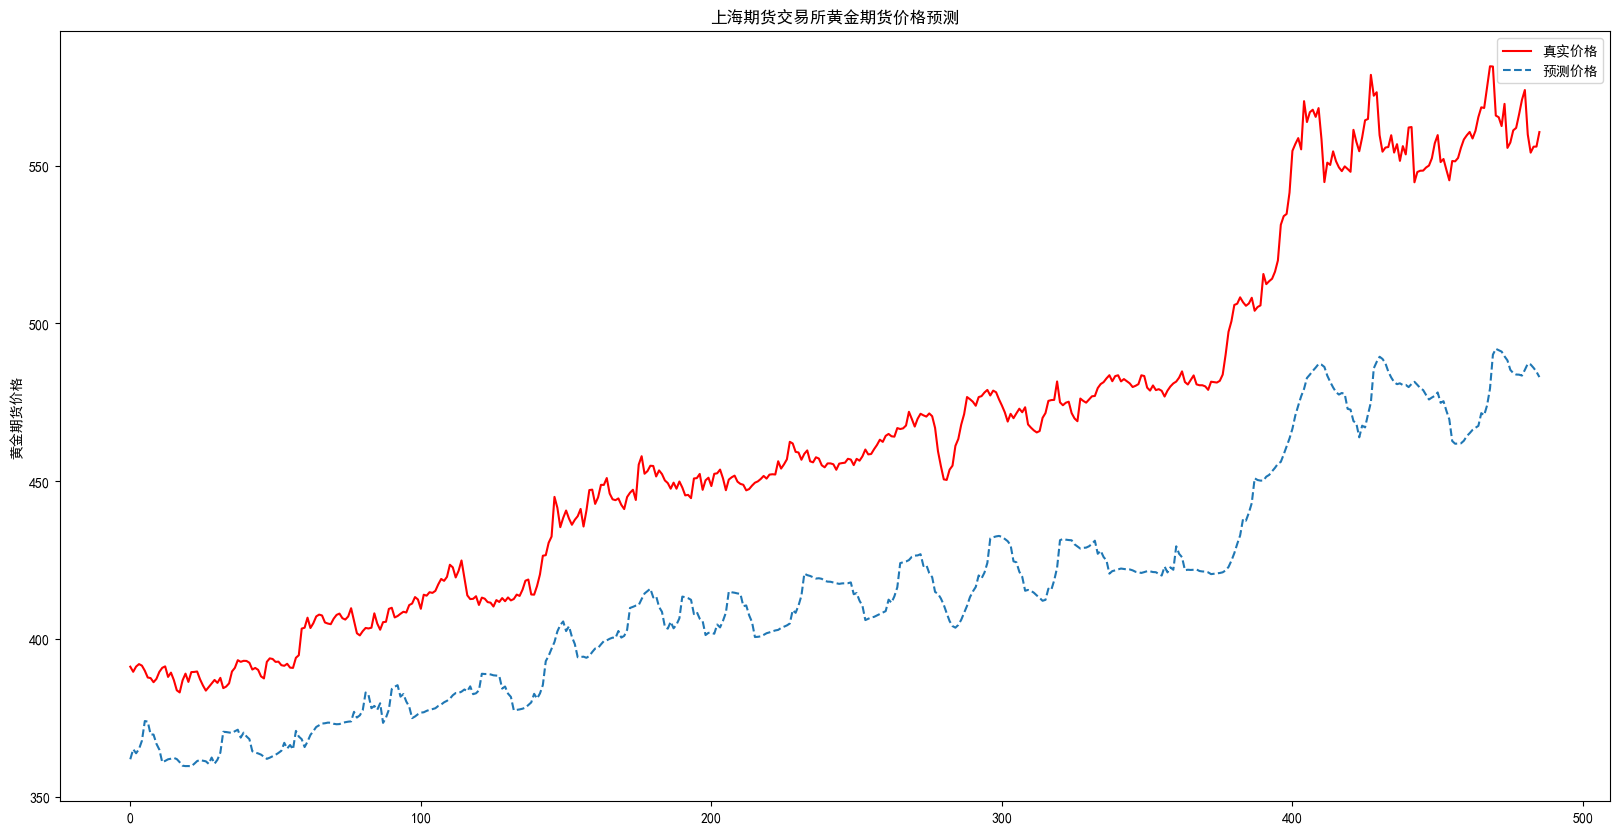

In [15]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']    #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False      #用来正常显示负号
plt.figure(figsize=(20,10))
plt.plot(np.exp(df.truth), 'r', label='真实价格')
plt.plot(np.exp(df.pred), '--', label='预测价格')
plt.title('上海期货交易所黄金期货价格预测')
plt.ylabel('黄金期货价格')
plt.legend()
plt.show()